In [23]:
## MP 573 Lecture 16: Limitations of Fourier analysis. Introduction to the STFT. 
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

array([  0.,   0.,   0., ..., 100., 100., 100.])

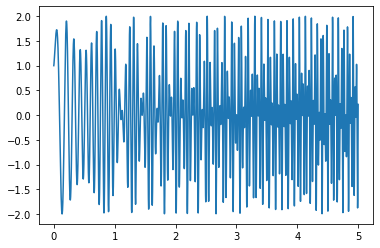

In [77]:
# Simulate 1D complex sinusoidal signal, and plot its real/imaginary values, and also magnitude/phase
N = 100000
tmax = 100
t = np.linspace(0,tmax,N)
u0 = 10 # This is the frequency of our complex exponential, in cycles per unit length
s = np.cos(2*np.pi*u0*t**1.5) + np.sin(2*np.pi*u0*t**1.3)
plt.plot(t[0:5000],s[0:5000])
t

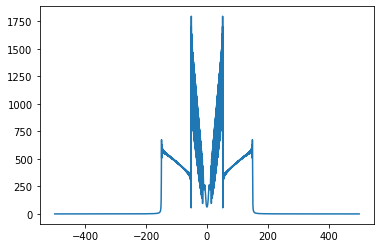

In [78]:
shat = np.fft.fftshift(np.fft.fft(s))
freq_range = 1/(t[1]-t[0])
freqs = np.linspace(-freq_range/2,freq_range/2,N)
plt.plot(freqs,abs(shat))

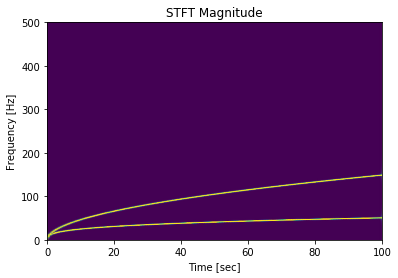

In [81]:
f, t, Zxx = signal.stft(s, fs=N/tmax,nperseg=1000)
plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=0.2,shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()